In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\arunr\\Downloads\\archive (39)\\customer_purchase_data.csv")

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.shape

(1500, 9)

In [5]:
print(df.isna().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

112

In [12]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [9]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [94]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [13]:
#removing all the whitespaces from the coloumn names
df.columns=df.columns.str.strip()
print(df.columns)

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')


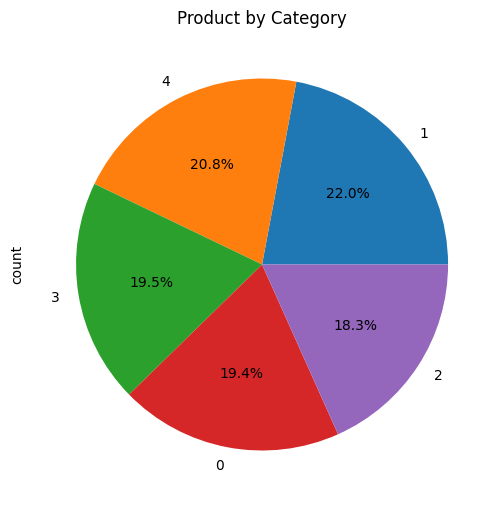

In [98]:
#plotting
plt.figure(figsize=(6, 8))
df['ProductCategory'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Product by Category")
plt.show()

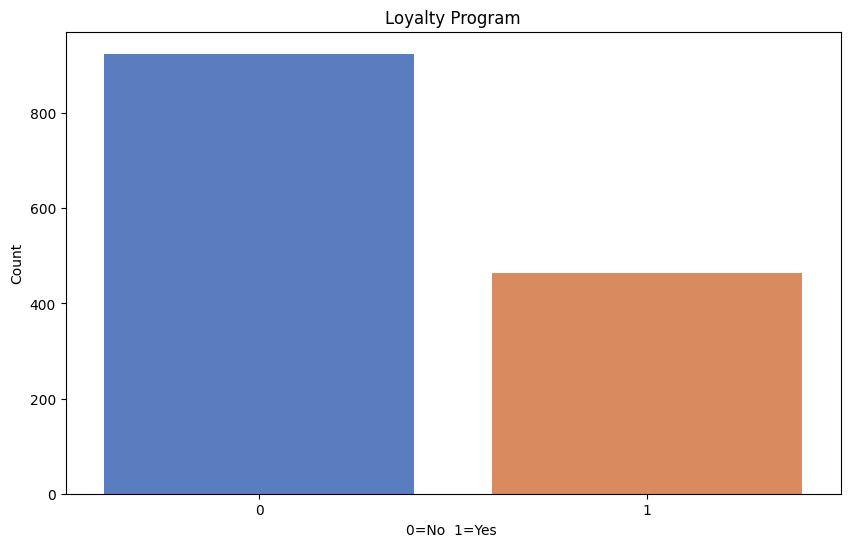

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LoyaltyProgram', data=df, palette='muted')
plt.title('Loyalty Program')
plt.xlabel('0=No  1=Yes ')
plt.ylabel('Count')
plt.show()


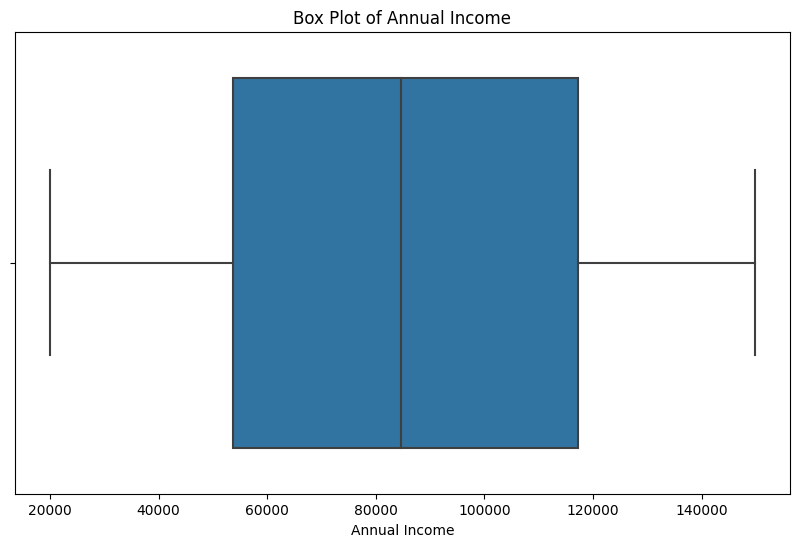

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AnnualIncome'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

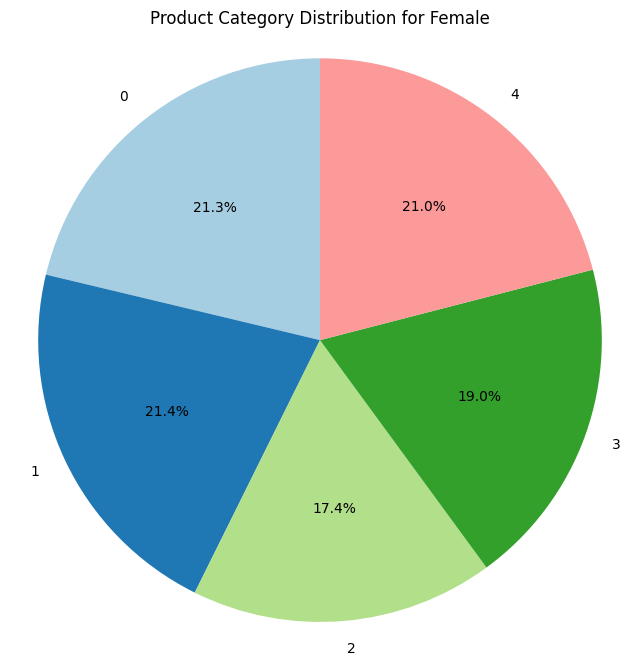

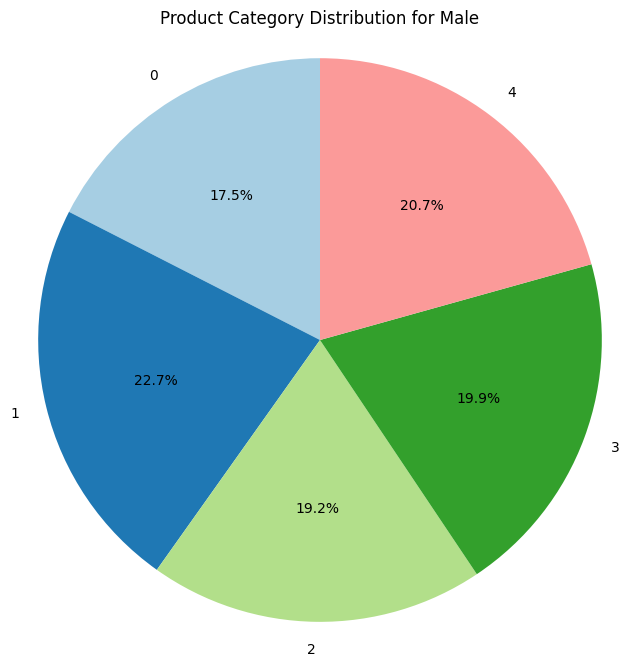

In [114]:

gen = df.groupby(['Gender', 'ProductCategory']).size().unstack()

gender=1
plt.figure(figsize=(8, 8))
plt.pie(gen.loc[gender],
        labels=gen.columns,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
    )
plt.title(f'Product Category Distribution for Female')
plt.axis('equal') 
plt.show()


gender=0
plt.figure(figsize=(8, 8))
plt.pie(gen.loc[gender],
        labels=gen.columns,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
    )
plt.title(f'Product Category Distribution for Male')
plt.axis('equal') 
plt.show()

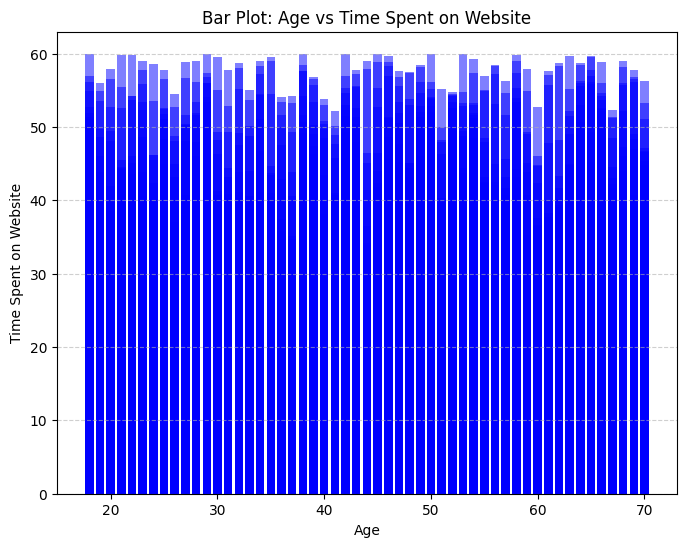

In [119]:
# Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(df['Age'], df['TimeSpentOnWebsite'], color='blue', alpha=0.5)
plt.title('Bar Plot: Age vs Time Spent on Website')
plt.xlabel('Age')
plt.ylabel('Time Spent on Website')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



c:\Users\arunr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


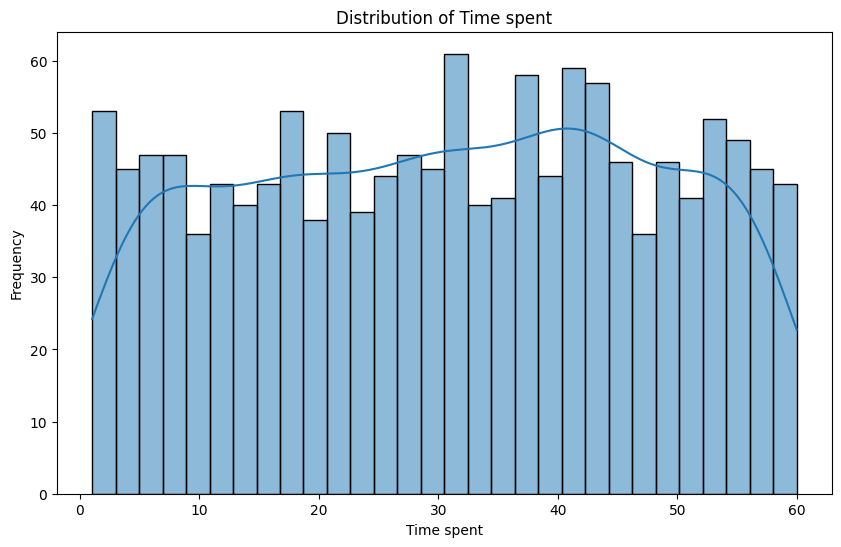

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TimeSpentOnWebsite'], kde=True, bins=30)
plt.title('Distribution of Time spent')
plt.xlabel('Time spent')
plt.ylabel('Frequency')
plt.show()

In [14]:
#converting AnnualIncome and TimeSpentOnWebsite to integer
cl = ['AnnualIncome', 'TimeSpentOnWebsite']
df[cl] = df[cl].round(0).astype(int)


In [121]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,31,0,5,1
1,20,1,23580,4,2,38,0,5,0
2,27,1,127821,11,2,32,1,0,1
3,24,1,137799,19,3,46,0,4,1
4,31,1,99301,19,1,20,0,0,1


In [16]:
df.corr()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.018998,0.012101,-0.046969,-0.014159,0.019124,-0.001972,0.019256,-0.253598
Gender,0.018998,1.000000,0.017677,0.001941,-0.023306,0.006282,0.039219,-0.046821,0.008856
AnnualIncome,0.012101,0.017677,1.000000,0.003408,0.025699,-0.003785,-0.037318,0.022385,0.191219
NumberOfPurchases,-0.046969,0.001941,0.003408,1.000000,0.017422,0.031172,0.052561,0.026414,0.219116
ProductCategory,-0.014159,-0.023306,0.025699,0.017422,1.000000,-0.006054,0.032945,0.022225,0.014349
TimeSpentOnWebsite,0.019124,0.006282,-0.003785,0.031172,-0.006054,1.000000,0.001148,0.006279,0.282395
LoyaltyProgram,-0.001972,0.039219,-0.037318,0.052561,0.032945,0.001148,1.000000,-0.049638,0.318059
DiscountsAvailed,0.019256,-0.046821,0.022385,0.026414,0.022225,0.006279,-0.049638,1.000000,0.296606
PurchaseStatus,-0.253598,0.008856,0.191219,0.219116,0.014349,0.282395,0.318059,0.296606,1.000000


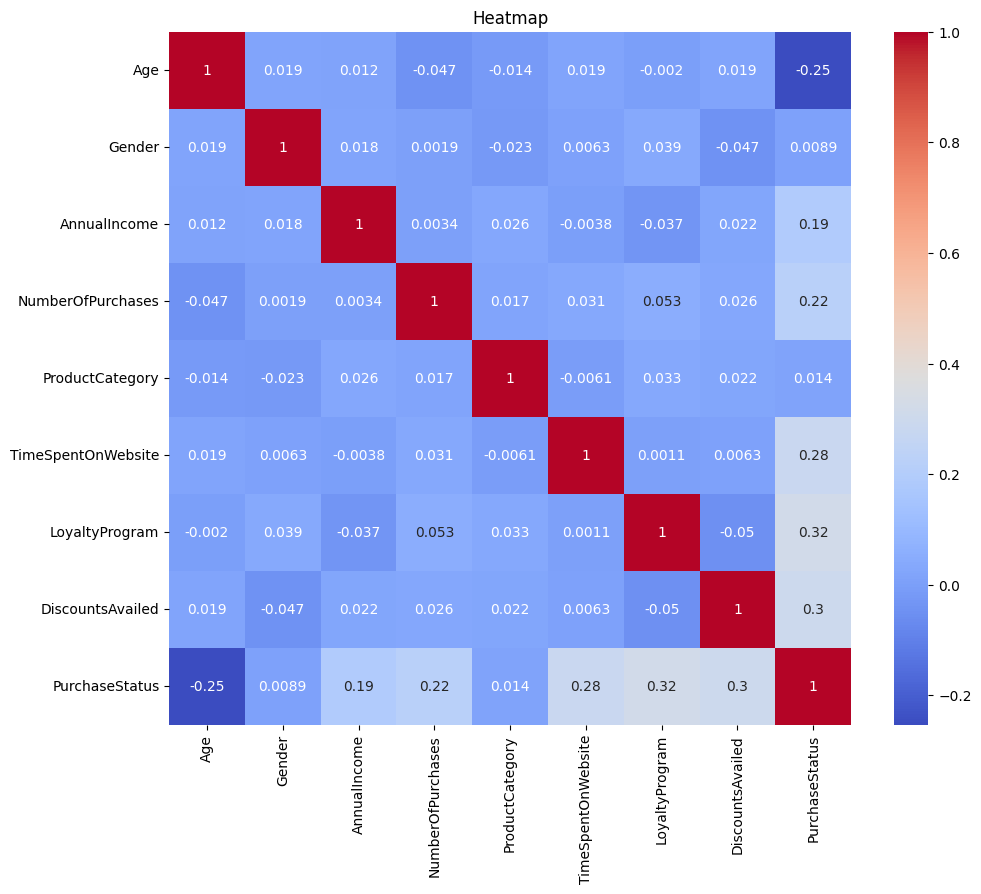

In [17]:
#heatmap
plt.figure(figsize=(11,9))
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
df['AnnualIncome'] = scaler.fit_transform(df['AnnualIncome'].values.reshape(-1, 1))

In [125]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,0.355347,8,0,31,0,5,1
1,20,1,0.027569,4,2,38,0,5,0
2,27,1,0.830764,11,2,32,1,0,1
3,24,1,0.907646,19,3,46,0,4,1
4,31,1,0.611012,19,1,20,0,0,1


In [126]:
print(corr_matrix['PurchaseStatus'].abs())

Age                   0.253598
Gender                0.008856
AnnualIncome          0.191219
NumberOfPurchases     0.219116
ProductCategory       0.014349
TimeSpentOnWebsite    0.282395
LoyaltyProgram        0.318059
DiscountsAvailed      0.296606
PurchaseStatus        1.000000
Name: PurchaseStatus, dtype: float64


In [127]:
#dropping Gender and ProductCategory
df.drop(columns=['Gender','ProductCategory'], inplace=True)

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
count = df['PurchaseStatus'].value_counts()

Text(0, 0.5, 'Count')

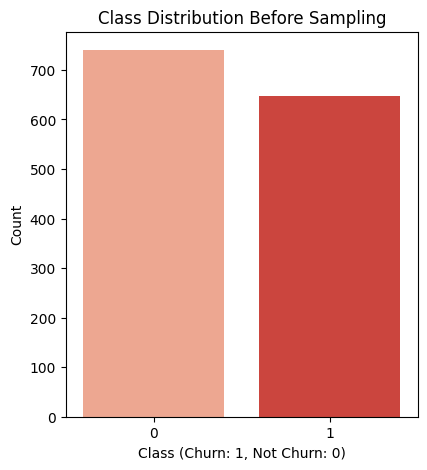

In [129]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=count.index, y=count.values, palette='Reds')
plt.title('Class Distribution Before Sampling')
plt.xlabel('Class (Churn: 1, Not Churn: 0)')
plt.ylabel('Count')

In [130]:
from sklearn.model_selection import train_test_split

In [162]:
x=df.drop(columns=['PurchaseStatus'])
y=df['PurchaseStatus']

In [163]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [164]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1110, 6)
(1110,)
(278, 6)
(278,)


In [181]:
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(xtrain,ytrain)

SVC(probability=True)

In [182]:
import joblib
joblib.dump(svc,'svm_model.joblib')


['svm_model.joblib']

In [183]:
svm_model = joblib.load('svm_model.joblib')

In [187]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

y_pred = svm_model.predict(xtest)

svm_accuracy = accuracy_score(ytest, y_pred)
svm_conf_matrix = confusion_matrix(ytest, y_pred)
svm_class_report = classification_report(ytest, y_pred)

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       149
           1       0.72      0.71      0.71       129

    accuracy                           0.74       278
   macro avg       0.74      0.74      0.74       278
weighted avg       0.74      0.74      0.74       278



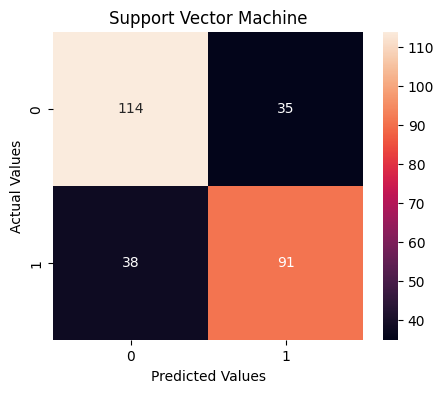

In [185]:
# Print the metrics
print(f'Accuracy: {svm_accuracy:.2f}')
print(f'\nClassification Report:\n{svm_class_report}')

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(svm_conf_matrix, annot=True,fmt="d")
plt.title('Support Vector Machine')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
knn.fit(xtrain, ytrain) 

KNeighborsClassifier()

In [171]:
joblib.dump(knn,'knn_model.joblib')
knn_model = joblib.load('knn_model.joblib')

In [172]:
y_pred = knn_model.predict(xtest)

knn_accuracy = accuracy_score(ytest, y_pred)
knn_conf_matrix = confusion_matrix(ytest, y_pred)
knn_class_report = classification_report(ytest, y_pred)

Accuracy: 0.70

Confusion Matrix:
[[107  42]
 [ 41  88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       149
           1       0.68      0.68      0.68       129

    accuracy                           0.70       278
   macro avg       0.70      0.70      0.70       278
weighted avg       0.70      0.70      0.70       278



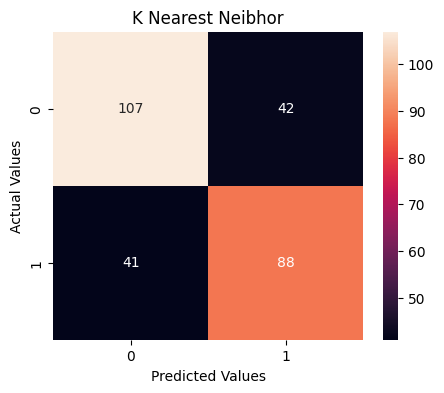

In [173]:
# Print the metrics
print(f'Accuracy: {knn_accuracy:.2f}')
print(f'\nConfusion Matrix:\n{knn_conf_matrix}')
print(f'\nClassification Report:\n{knn_class_report}')


#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(knn_conf_matrix, annot=True,fmt="d")
plt.title('K Nearest Neibhor')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [174]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
lg = LogisticRegression()

# Fit the model to the training data
lg.fit(xtrain, ytrain)


LogisticRegression()

In [175]:
joblib.dump(lg,'lg_model.joblib')
lg_model = joblib.load('lg_model.joblib')

In [176]:
y_pred = lg_model.predict(xtest)

lg_accuracy = accuracy_score(ytest, y_pred)
lg_conf_matrix = confusion_matrix(ytest, y_pred)
lg_class_report = classification_report(ytest, y_pred)

Accuracy: 0.85

Confusion Matrix:
[[126  23]
 [ 18 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       149
           1       0.83      0.86      0.84       129

    accuracy                           0.85       278
   macro avg       0.85      0.85      0.85       278
weighted avg       0.85      0.85      0.85       278



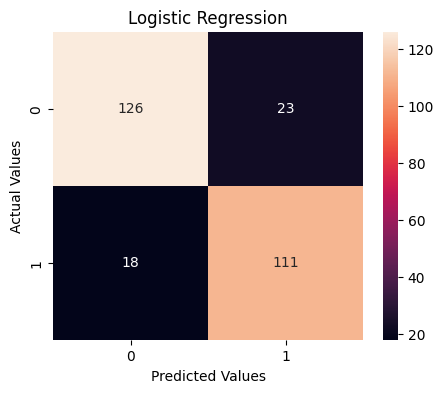

In [177]:
# Print the metrics
print(f'Accuracy: {lg_accuracy:.2f}')
print(f'\nConfusion Matrix:\n{lg_conf_matrix}')
print(f'\nClassification Report:\n{lg_class_report}')


#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(lg_conf_matrix, annot=True,fmt="d")
plt.title('Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [189]:
lg_pred = lg.predict_proba(xtest)[:, 1]
svm_pred = svc.predict_proba(xtest)[:, 1]
knn_pred = knn.predict_proba(xtest)[:, 1]

In [190]:
# Compute ROC curves and AUC scores
lg_fpr, lg_tpr, _ = roc_curve(ytest,lg_pred)
svm_fpr, svm_tpr, _ = roc_curve(ytest, svm_pred)
knn_fpr, knn_tpr, _ = roc_curve(ytest, knn_pred)

log_reggr_auc = roc_auc_score(ytest, lg_pred)
svm_auc = roc_auc_score(ytest, svm_pred)
knn_auc = roc_auc_score(ytest, knn_pred)

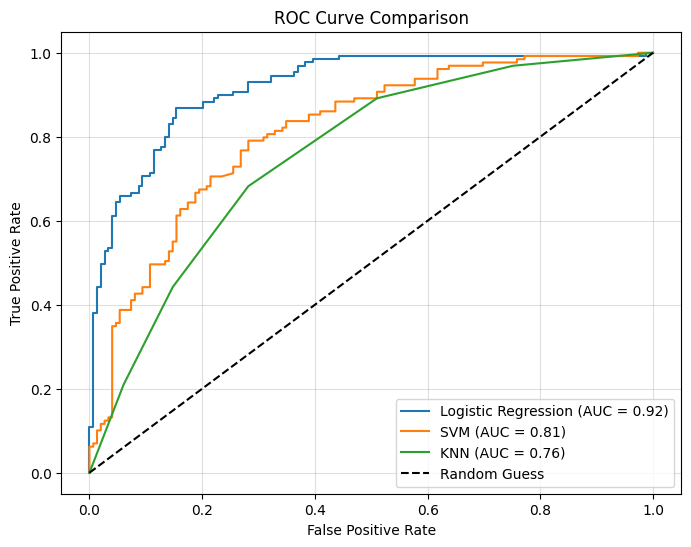

In [191]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lg_fpr, lg_tpr, label=f'Logistic Regression (AUC = {log_reggr_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve of the Machine Learning Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()